In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [28]:
def make_plot(task, short_model_name, metric, fit_reg=False):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.cross_score()
    stats_path = "../../../data_exploration/acl/tables/basic_stats_{}_{}.xlsx".format(task, short_model_name)
    df = pd.merge(df, pd.read_excel(stats_path)[["language", "test_avg_tokens"]], how="left", 
                  left_on="Test-Language", right_on="language")
    df = df.rename(columns={"test_avg_tokens": "Average-Example-Length"})
    df.loc[:, "Cross-Score"] *= 100

    plots.scatter(x="Average-Example-Length", 
                  y="Cross-Score",
                  data=df,
                  kind="relplot",
                  style="Test-Group",
                  xaxis_title="Average Test Length (tokens)",
                  yaxis_title="Cross-Language Score",
                  title=(task + " " + short_model_name).upper(),
                  remove_labels=True,
                  alpha=0.75)

    leg = plt.gca().get_legend()
    leg.texts[0].set_text("Train Group")
    leg.texts[5].set_text("Test Group")

    print(pearsonr(x=df["Average-Example-Length"], y=df["Cross-Score"]))
    
    if fit_reg:
        x = df["Average-Example-Length"].values
        y = df["Cross-Score"].values

        m, b = np. polyfit(x, y, 1)
        x = np.arange(x.min(), x.max(), 1)
        plt.plot(x, m*x + b, "gray")

# PoS

In [29]:
task = "pos"
metric = "Accuracy"

(-0.18070539277462594, 0.0015020443977869936)


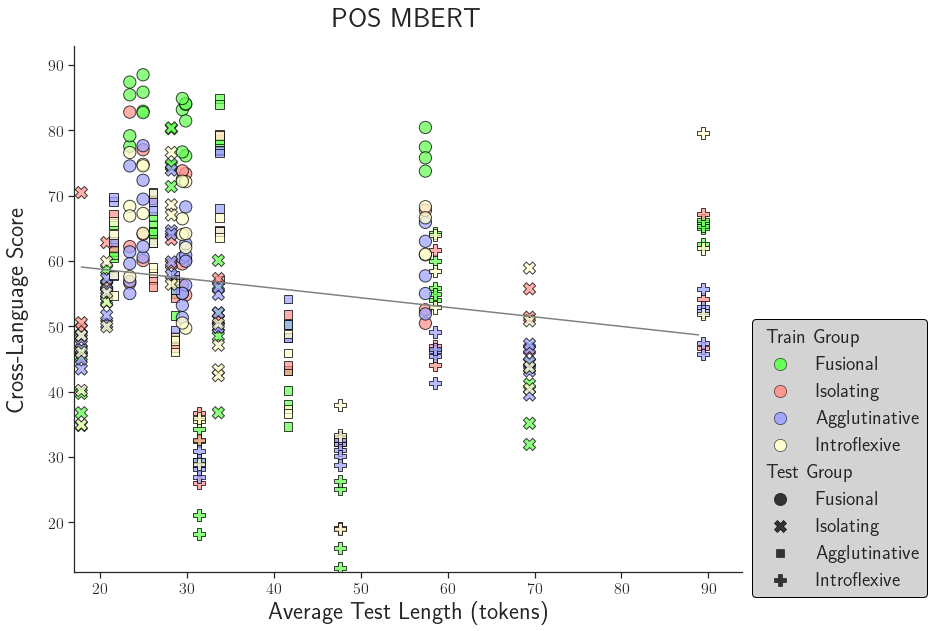

In [31]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=True)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

(-0.31694617579338014, 1.4412956195596682e-08)


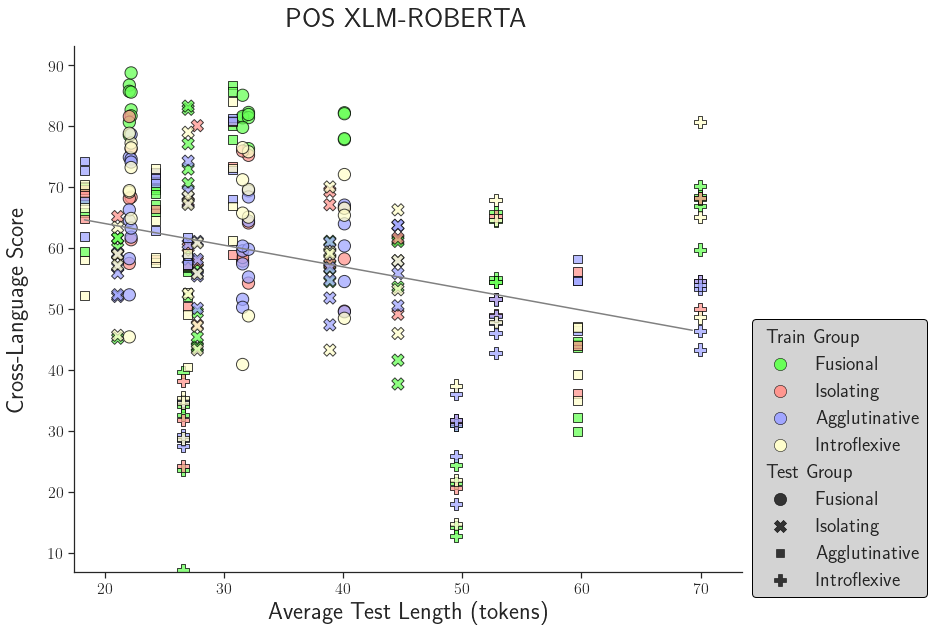

In [33]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric, fit_reg=True)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

# Sentiment

In [34]:
task = "sentiment"
metric = "Macro_F1"

(-0.20537116810978345, 0.00013081310981782914)


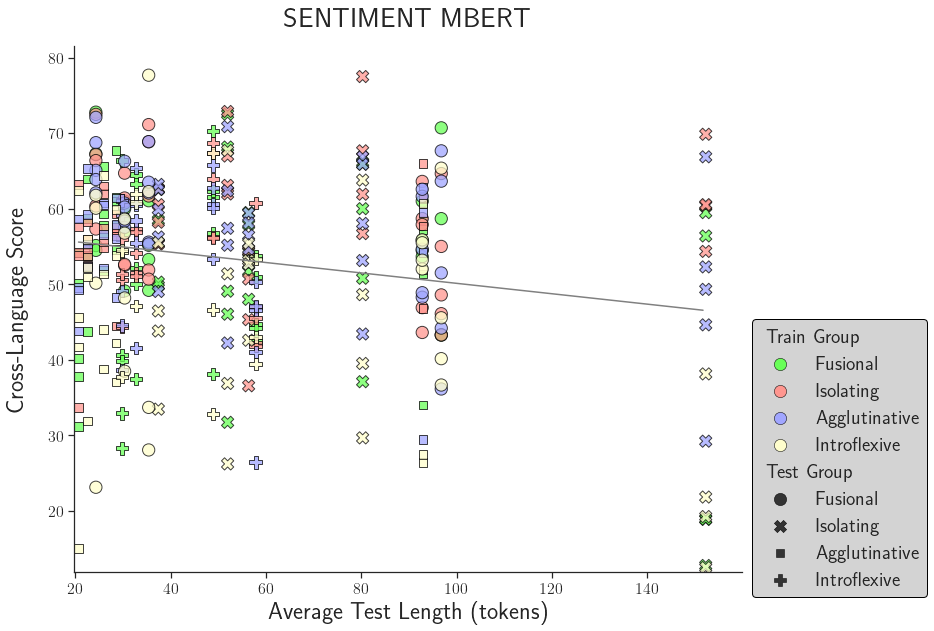

In [35]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=True)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

(-0.07483543816818272, 0.16733432746789292)


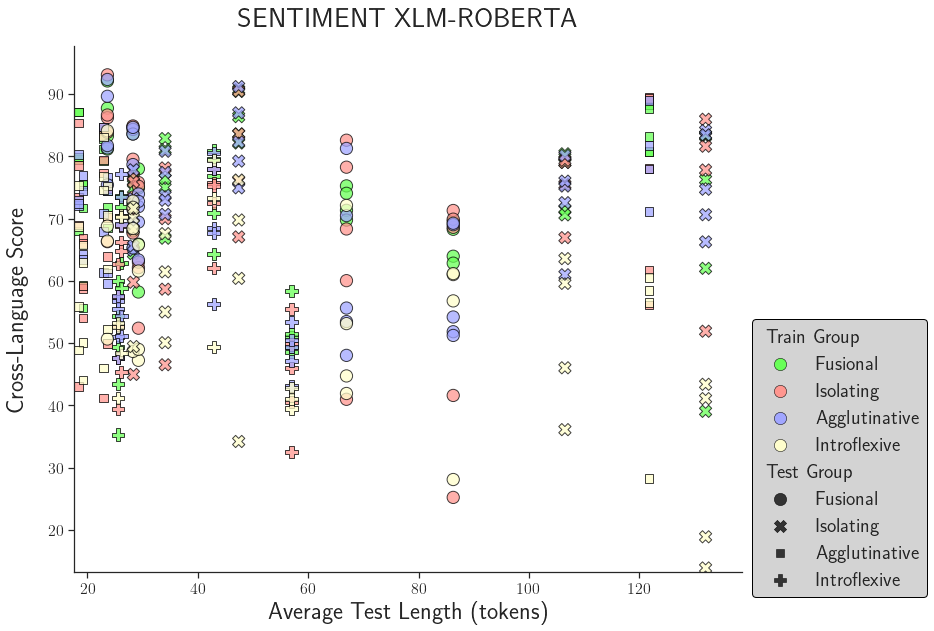

In [36]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")